In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 8,6
sns.set()

In [2]:
gld = pd.DataFrame(pdr.get_data_yahoo('GLD')['Close'])

In [9]:
gld.tail()

,Close,returns,ma,ratio
Date,,,,
2022-02-11,173.809998,0.018876,170.099048,1.021816
2022-02-14,174.740005,0.005336,170.317143,1.025968
2022-02-15,173.080002,-0.009545,170.479524,1.015254
2022-02-16,174.860001,0.010232,170.740000,1.024130
2022-02-17,177.250000,0.013576,170.986191,1.036633


In [5]:
ma = 21
gld['returns'] = np.log(gld["Close"]).diff()
gld['ma'] = gld['Close'].rolling(ma).mean()
gld['ratio'] = gld['Close'] / gld['ma']

In [6]:
gld['ratio'].describe()

count    1239.000000
mean        1.003232
std         0.020022
min         0.915509
25%         0.990601
50%         1.002003
75%         1.015910
max         1.087576
Name: ratio, dtype: float64

In [7]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(gld['ratio'].dropna(), percentiles)

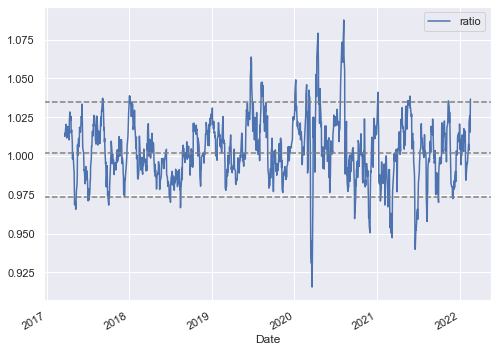

In [8]:
gld['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--');

In [10]:
short = p[-1]
long = p[0]
gld['position'] = np.where(gld.ratio > short, -1, np.nan)
gld['position'] = np.where(gld.ratio < long, 1, gld['position'])
gld['position'] = gld['position'].ffill()

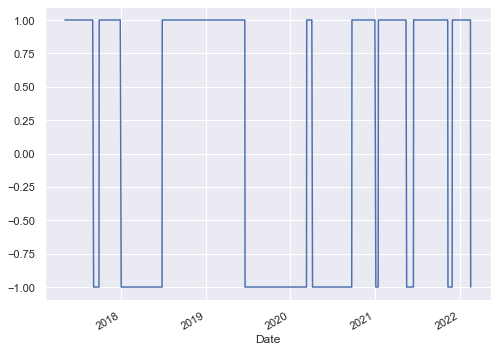

In [12]:
gld.position.dropna().plot();

In [13]:
gld['strat_return'] = gld['returns'] * gld['position'].shift()

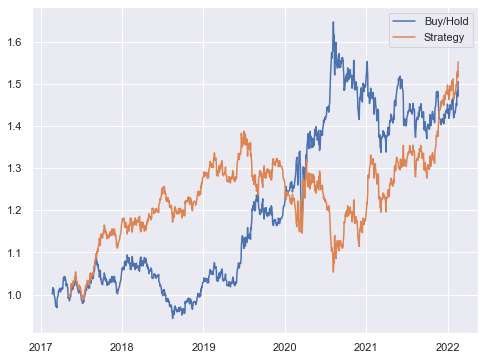

In [14]:
plt.plot(np.exp(gld['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend();

In [15]:
print(np.exp(gld['returns'].dropna()).cumprod()[-1] -1)
print(np.exp(gld['strat_return'].dropna()).cumprod()[-1] - 1)

0.5053078556263273
0.5522719225250925
